## Imports

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import os
import time
import string
import sys
from sklearn.preprocessing import StandardScaler
sys.path.append("../src")
from vibe_recommender import VibeRecommender, PERSONAS

In [5]:
df = pd.read_csv("../data/spotify_tracks.csv")
df = df.dropna(subset=["track_name", "artists"])
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [6]:
df.info()
df.describe()[["danceability","energy","valence","acousticness","instrumentalness","liveness","speechiness","tempo"]]
df["track_genre"].value_counts().head(20)

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        113999 non-null  int64  
 1   track_id          113999 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        113999 non-null  int64  
 6   duration_ms       113999 non-null  int64  
 7   explicit          113999 non-null  bool   
 8   danceability      113999 non-null  float64
 9   energy            113999 non-null  float64
 10  key               113999 non-null  int64  
 11  loudness          113999 non-null  float64
 12  mode              113999 non-null  int64  
 13  speechiness       113999 non-null  float64
 14  acousticness      113999 non-null  float64
 15  instrumentalness  113999 non-null  float64
 16  liveness          113999 

track_genre
acoustic             1000
afrobeat             1000
psych-rock           1000
progressive-house    1000
power-pop            1000
pop                  1000
pop-film             1000
piano                1000
party                1000
pagode               1000
opera                1000
new-age              1000
mpb                  1000
minimal-techno       1000
metalcore            1000
metal                1000
mandopop             1000
malay                1000
latino               1000
latin                1000
Name: count, dtype: int64

In [10]:
VIBE_COLS = [
    "danceability",     # 0–1
    "energy",           # 0–1
    "valence",          # 0–1 (sad → happy)
    "acousticness",     # 0–1 (electronic → acoustic)
    "instrumentalness", # 0–1 (vocals → instrumental)
    "speechiness",      # 0–1 (musical → spoken/rap)
]
X_raw = df[VIBE_COLS].values

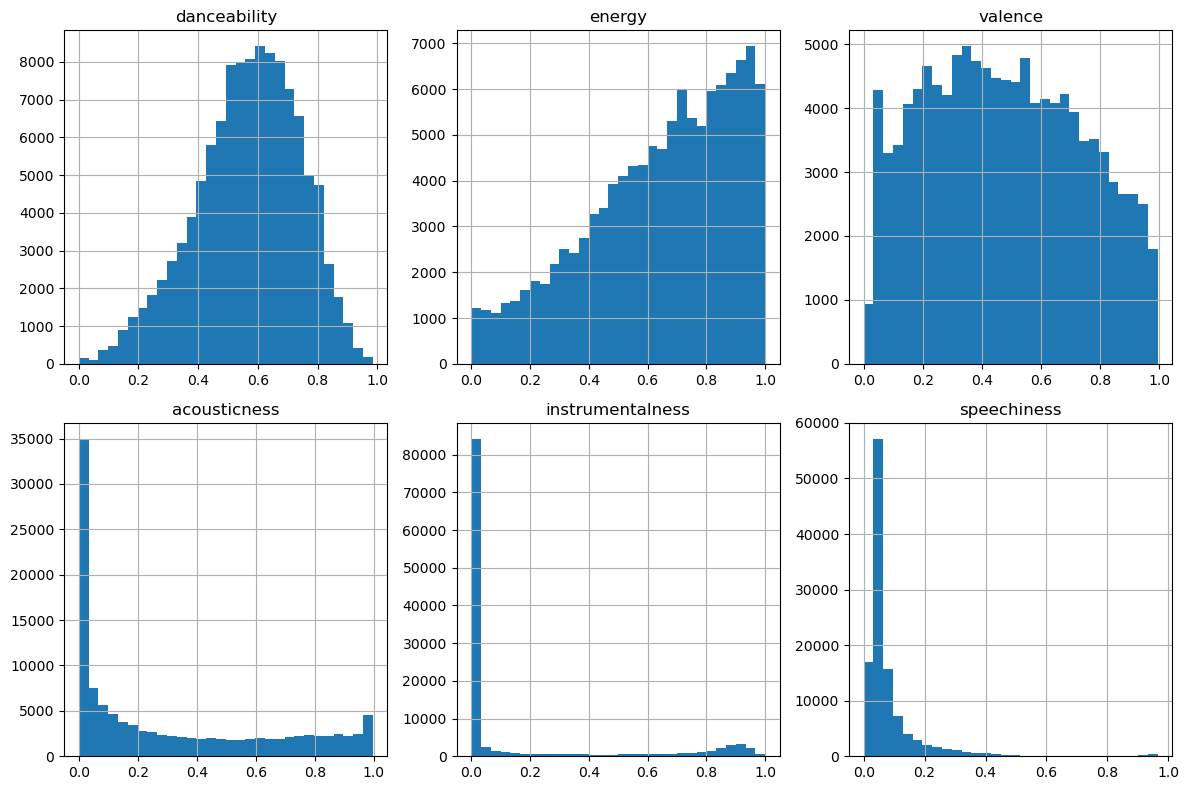

In [ ]:
plt.figure(figsize=(12, 8))

for i, col in enumerate(VIBE_COLS, 1):
    plt.subplot(2, 3, i)
    df[col].hist(bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()

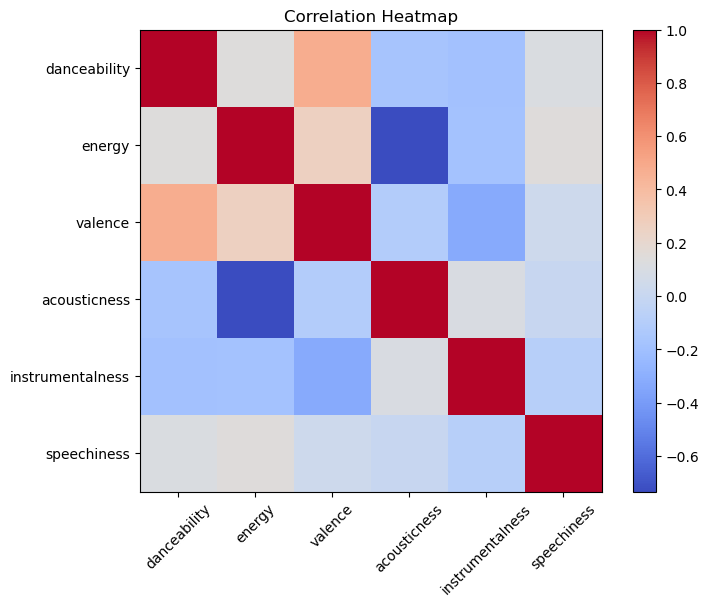

In [11]:
plt.figure(figsize=(8,6))
plt.imshow(df[VIBE_COLS].corr(), cmap="coolwarm", interpolation="nearest")
plt.colorbar()
plt.xticks(range(len(cols)), cols, rotation=45)
plt.yticks(range(len(cols)), cols)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
scaler = StandardScaler().fit(X_raw)
X = scaler.transform(X_raw)

In [ ]:
target_raw = [
    slider_danceability / 100.0,
    slider_energy       / 100.0,
    slider_valence      / 100.0,
    slider_acousticness / 100.0,
    slider_instr        / 100.0,
    slider_speech       / 100.0,
]
target = scaler.transform([target_raw])[0]


## Initialize Recommender

In [7]:
rec = VibeRecommender(df)

### MODE 1: sliders

In [12]:
sliders = {
    "danceability": 80,
    "energy": 75,
    "valence": 60,
    "acousticness": 30,
    "instrumentalness": 20,
    "speechiness": 20,
}
recs_vibe = rec.recommend_by_sliders(
    sliders,
    top_k=20,
    lambda_vibe=0.7,
    min_popularity=40,
    hide_explicit=True,
)
recs_vibe[["track_name", "artists", "track_genre", "popularity", "vibe_score"]].head()

,track_name,artists,track_genre,popularity,vibe_score
30354,Breaking Me,Topic;A7S,edm,78,0.878682
51675,Zingaat,Ajay-Atul,hip-hop,59,0.878682
91010,Believer,Imagine Dragons,rock,88,0.878682
30598,Dancing Feet (feat. DNCE),Kygo;DNCE,edm,79,0.878682
104199,A Mí,Rels B,spanish,80,0.871925


### MODE 2A – Surprise me from seeds

In [13]:
# Pick 3 favorite track_ids from the dataframe:
seed_track_ids = df.sample(3)["track_id"].tolist()
seed_track_ids

['2Dj9OOoQHG5f0jlL5vt7Ve', '3HhACviCwgDBnWBEZpgKGs', '2RH5xmKhHg8WiOYmItdMnR']

In [14]:
recs_surprise_user = rec.surprise_me(
    seed_track_ids=seed_track_ids,
    top_k=20,
    lambda_vibe=0.7,
    min_popularity=30,
    hide_explicit=False,
)

recs_surprise_user[["track_name", "artists", "track_genre", "popularity", "vibe_score"]].head()

,track_name,artists,track_genre,popularity,vibe_score
56768,the perfect pair,beabadoobee,indie-pop,77,0.884583
31105,Stay,Zedd;Alessia Cara,electro,76,0.882831
20300,Lonely,Akon,dance,81,0.882831
68801,Volando - Remix,Mora;Bad Bunny;Sech,latino,83,0.882831
30731,Fast Car,Jonas Blue;Dakota,edm,73,0.882831


### MODE 2B – Persona-based “Surprise me”

In [17]:
## vibes
PERSONAS.keys()
# e.g. dict_keys(['night_drive', 'sad_girl_autumn', 'deep_focus', 'happy_pop'])

recs_night_drive = rec.surprise_me(
    seed_track_ids=None,
    persona_name="night_drive",
    top_k=20,
    lambda_vibe=0.8,
    min_popularity=20,
    hide_explicit=True,
)

recs_night_drive[["track_name", "artists", "track_genre", "popularity", "persona_used"]].head()

,track_name,artists,track_genre,popularity,persona_used
32183,Tokyo,Dwin;Kush Kush,electronic,63,night_drive
30357,Loco Contigo (feat. J. Balvin & Tyga),DJ Snake;J Balvin;Tyga,edm,74,night_drive
83303,Mammoth,Dimitri Vegas & Like Mike;MOGUAI,progressive-house,56,night_drive
43205,Bugatti,Serge Legran,groove,42,night_drive
68728,Los Cachos,Piso 21;Manuel Turizo,latino,85,night_drive


In [18]:
## random vibes
recs_random = rec.surprise_me(top_k=20)
recs_random[["track_name", "artists", "track_genre", "persona_used"]].head()

,track_name,artists,track_genre,persona_used
16629,"The Four Seasons - Winter in F Minor, RV. 297:...",Antonio Vivaldi;Adrian Chandler;La Serenissima,classical,deep_focus
84102,Breathe (In the Air),Pink Floyd,psych-rock,deep_focus
112399,M.,Anıl Emre Daldal,turkish,deep_focus
15247,Falling in Love,Holem,chill,deep_focus
30550,Chamber Of Reflection,Mac DeMarco,edm,deep_focus
